In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.cross_validation import LabelKFold
from scipy import interp
from sklearn import cross_validation
import pylab as pl

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from os import environ
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline  


In [51]:
df_raw = pd.read_csv("../data/raw.csv")

In [88]:
import math
df_raw = df_raw[['dialog','tid','id','p_da','da','secs','words','tchange']]
df_raw = df_raw.dropna()
df_f = df_raw[df_raw.words > 0]

dact_name_map = {
 'SD'  : 'Statement',
 'B'   : 'Backchannel',
 'SV'  : 'Opioning',
 'AA'  : 'Agree',
 '%'   : 'Uninterpretable' ,
 'Q'   : 'Question',
 'A'   : 'Answer',
 'NA'  : 'N/A',
 '+'   : 'Incomplete'   
}

s_with_names = df_f['da']
new_s_with_name = s_with_names.replace(dact_name_map)
df_f['da_name'] = new_s_with_name
df_f.head()



,dialog,tid,id,p_da,da,secs,words,tchange,da_name
0,sw2005,t3,da4,SV,AA,0.440000,1.0,1,Agree
1,sw2005,t4,da5,AA,AA,0.326500,2.0,0,Agree
2,sw2005,t4,da6,AA,SD,4.108500,14.0,1,Statement
3,sw2005,t4,da7,SD,%,0.676125,2.0,0,Uninterpretable
4,sw2005,t4,da8,%,SD,2.249125,9.0,0,Statement


In [118]:
plt.rcParams['figure.figsize']=(10,20)

In [109]:
sns.set(style="ticks", palette="muted")

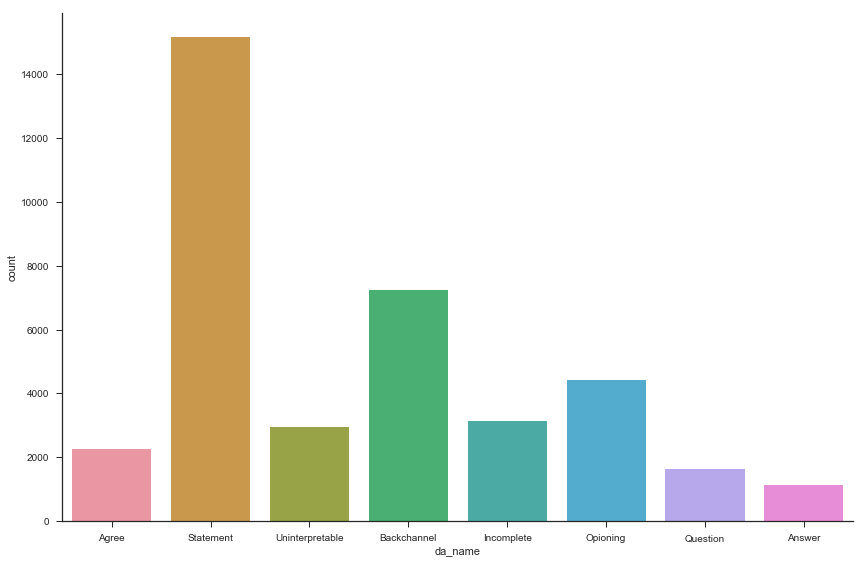

In [110]:
g = sns.factorplot(x="da_name", data=df_f, kind="count", size=8, aspect=1.5)

In [111]:
grid = sns.FacetGrid(df_f, col="secs", hue="tchange", col_wrap=5, size=1.5)

KeyboardInterrupt: 

ValueError: Image size of 540x390096 pixels is too large. It must be less than 2^16 in each direction.

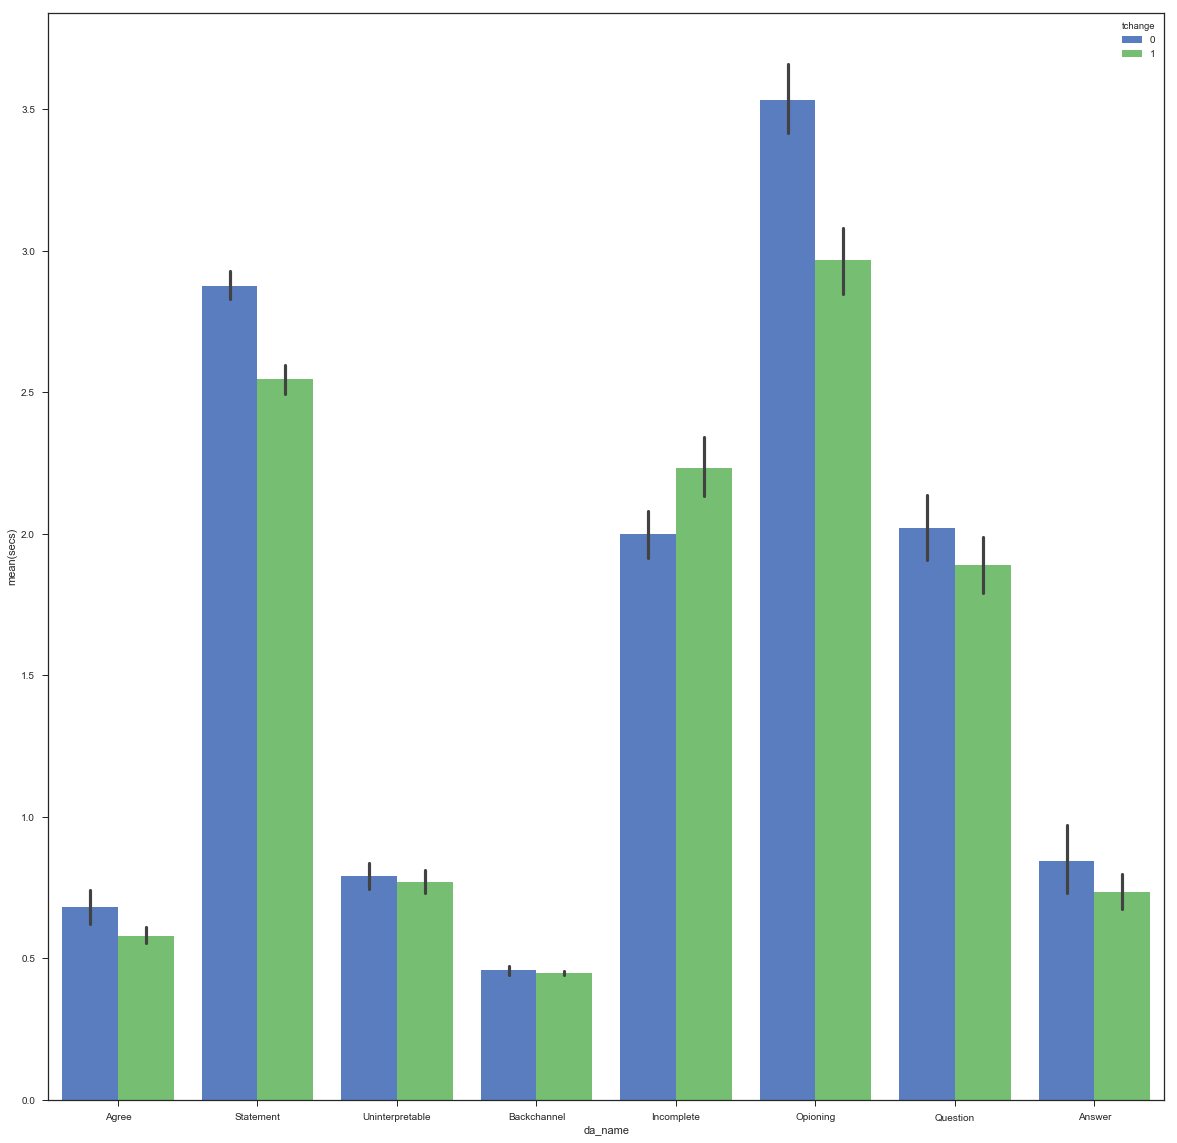

In [114]:
sns.barplot(x="da_name", y="secs", hue="tchange", data=df_f);

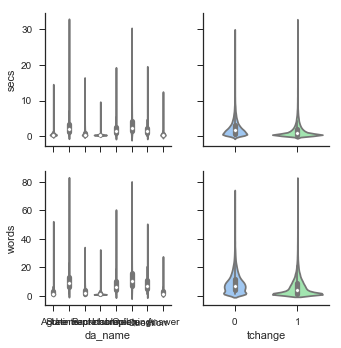

In [119]:
g = sns.PairGrid(df_f,
                 x_vars=["da_name",'tchange'],
                 y_vars=["secs", "words"])
g.map(sns.violinplot, palette="pastel");

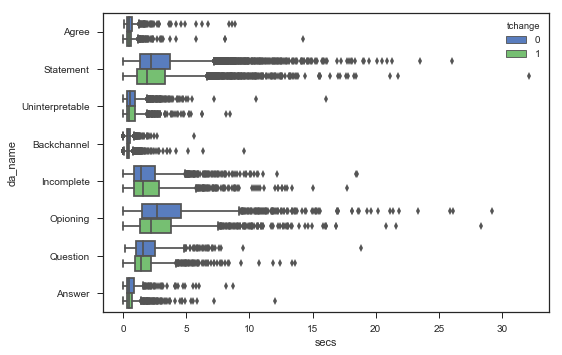

In [101]:

sns.boxplot(x="secs", y="da_name", hue="tchange",data=df_f);

In [11]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
Xtrain = X[:9000]
Xtest = X[9000:]
ytrain = y[:9000]
ytest = y[9000:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
X1, y1 = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
Xtrain1 = X1[:9000]
Xtest1 = X1[9000:]
ytrain1 = y1[:9000]
ytest1 = y1[9000:]

clf1 = LogisticRegression()
clf1.fit(Xtrain1, ytrain1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = clf.predict_proba(Xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

preds1 = clf1.predict_proba(Xtest1)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(ytest, preds1)
df1 = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1))


ggplot()+ geom_line(data=df, aes(x='fpr', y='tpr',colour="blue"),size=1 )
   # geom_line(data=df1, aes(x='fpr1', y='tpr1',colour="red"),size=1 )+\
   # scale_color_discrete(name = "Y series", labels = c("auc1", "acu2"))

#ggplot() + geom_line() +  ggtitle("ROC Curve w/ AUC=%s" % str(auc))
    #geom_abline(linetype='dashed')

SyntaxError: non-keyword arg after keyword arg (<ipython-input-24-9976d1d0c748>, line 14)

In [9]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

TypeError: 'int' object is not iterable

In [25]:
p = ggplot(aes(x='date', y='beef'), data=meat)

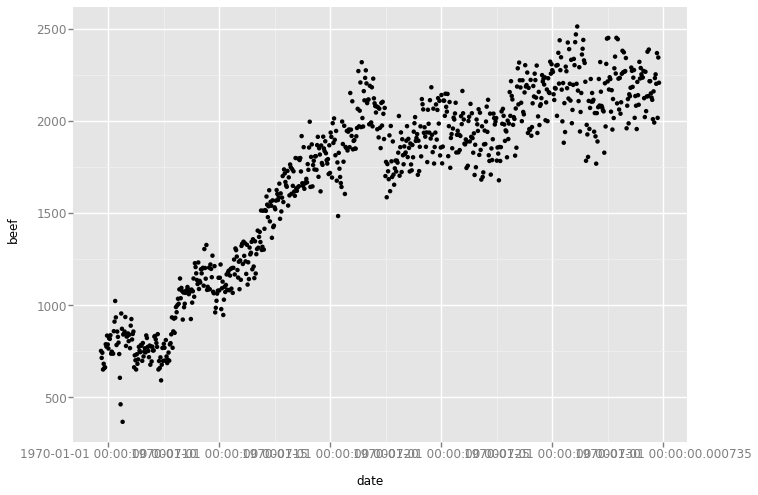

<ggplot: (19017890)>

In [26]:
p + geom_point()

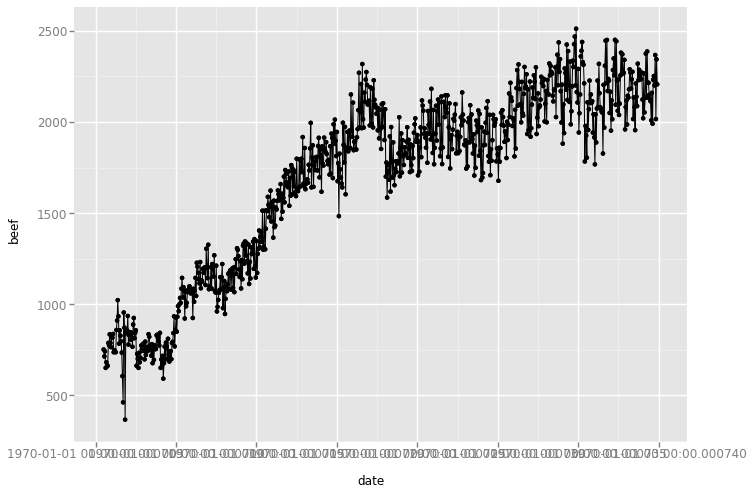

<ggplot: (19017890)>

In [27]:
p + geom_point() + geom_line()

C:\Users\tmeshorer\Anaconda2\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


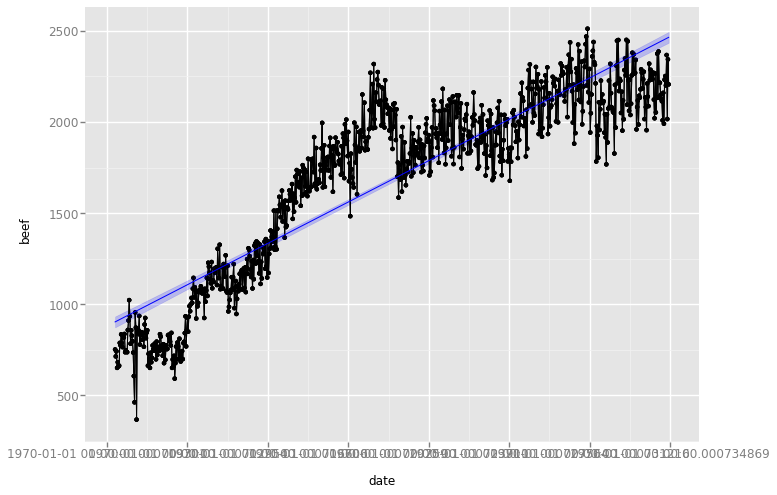

<ggplot: (19017890)>

In [28]:
p + geom_point() + geom_line() + stat_smooth(color='blue')

In [3]:
df = pd.read_csv("../data/all_df.csv")
list(df)

IOError: File ../data/all_df.csv does not exist

In [66]:
df2 = df[['tid','dialog','swbdType','secs','tstart','tend','words','speaker','p_speaker','precent_secs_sofar','time_control']]
df2['tsec'] = df2.tend -df2.tstart
df3 = df2.dropna()
df3.head()    
df4 = df3[['tid','dialog','swbdType','secs','words','tsec','speaker','p_speaker','precent_secs_sofar','time_control']]
df4.head()

C:\Users\tmeshorer\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,tid,dialog,swbdType,secs,words,tsec,speaker,p_speaker,precent_secs_sofar,time_control
3,t3,sw2032,qr,3.872500,13,3.872500,A,B,277.947246,77.268631
4,t5,sw2032,ba,0.240875,1,1.330875,A,A,9.148744,92.778328
5,t4,sw2032,sd@,5.714625,18,8.312625,B,B,1394.236048,22.731369
6,t5,sw2032,qy,1.090000,7,1.330875,A,A,50.548355,92.778328
7,t4,sw2032,+,1.552500,9,8.312625,B,A,2028.087832,22.731369


In [67]:
df4['tchange'] = 0
df4.loc[df4['speaker'] != df4['p_speaker'], 'tchange'] = 1
df4 = df4[['tid','dialog','swbdType','secs','words','tsec','tchange','precent_secs_sofar','time_control']]
df4.head()

C:\Users\tmeshorer\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,tid,dialog,swbdType,secs,words,tsec,tchange,precent_secs_sofar,time_control
3,t3,sw2032,qr,3.872500,13,3.872500,1,277.947246,77.268631
4,t5,sw2032,ba,0.240875,1,1.330875,0,9.148744,92.778328
5,t4,sw2032,sd@,5.714625,18,8.312625,0,1394.236048,22.731369
6,t5,sw2032,qy,1.090000,7,1.330875,0,50.548355,92.778328
7,t4,sw2032,+,1.552500,9,8.312625,1,2028.087832,22.731369


In [13]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

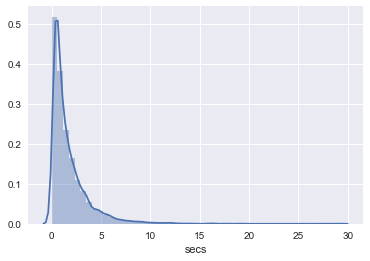

In [77]:
sns_plot = sns.distplot(df4.secs);
sns_plot.figure.savefig("../latex/figures/output.pdf")

In [57]:
df4.describe()

,secs,words,tsec,tchange,precent_secs_sofar
count,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000
mean,1.772147,6.863788,6.669159,0.558774,116.446456
std,2.014530,6.668699,8.156893,0.496603,203.297103
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.500000,2.000000,1.190000,0.000000,19.904534
50%,1.089562,5.000000,3.809250,1.000000,54.261620
75%,2.290844,10.000000,8.844000,1.000000,137.585233
max,29.177625,56.000000,48.521000,1.000000,2870.606408


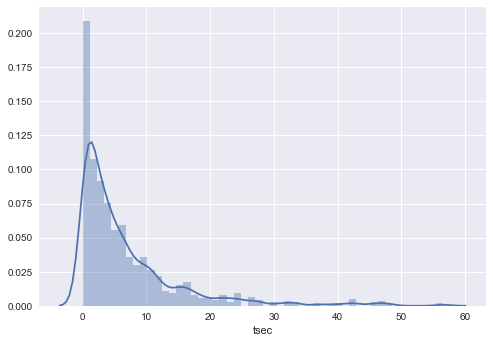

In [18]:
sns.distplot(df4.tsec);

In [68]:
-

,tid,dialog,swbdType,secs,words,tsec,tchange,precent_secs_sofar,time_control,da
3,t3,sw2032,qr,3.872500,13,3.872500,1,277.947246,77.268631,Q
4,t5,sw2032,ba,0.240875,1,1.330875,0,9.148744,92.778328,SD
5,t4,sw2032,sd@,5.714625,18,8.312625,0,1394.236048,22.731369,SD
6,t5,sw2032,qy,1.090000,7,1.330875,0,50.548355,92.778328,Q
7,t4,sw2032,+,1.552500,9,8.312625,1,2028.087832,22.731369,+


In [69]:
df5 = df4.copy()
df5.da = df5.da.str.strip(' ')
df6 = df5[df5.da !='Other'] 
df7 = df6[df6.da !='AD'] 
df7.head()

,tid,dialog,swbdType,secs,words,tsec,tchange,precent_secs_sofar,time_control,da
3,t3,sw2032,qr,3.872500,13,3.872500,1,277.947246,77.268631,Q
4,t5,sw2032,ba,0.240875,1,1.330875,0,9.148744,92.778328,SD
5,t4,sw2032,sd@,5.714625,18,8.312625,0,1394.236048,22.731369,SD
6,t5,sw2032,qy,1.090000,7,1.330875,0,50.548355,92.778328,Q
7,t4,sw2032,+,1.552500,9,8.312625,1,2028.087832,22.731369,+


In [70]:
#remove outliers
df8 = df7[np.abs(df7.secs-df7.secs.mean())<=(3*df7.secs.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df8 = df8[np.abs(df8.precent_secs_sofar-df8.precent_secs_sofar.mean())<=(2*df8.precent_secs_sofar.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.


df8.describe()

,secs,words,tsec,tchange,precent_secs_sofar,time_control
count,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000
mean,1.548207,6.225315,5.821526,0.574861,86.623431,50.534040
std,1.459202,5.488337,6.766926,0.494437,95.472228,13.579469
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.508623
25%,0.488125,2.000000,1.136750,0.000000,18.913163,41.649582
50%,1.020000,5.000000,3.573750,1.000000,48.445078,50.461325
75%,2.132875,9.000000,7.789375,1.000000,121.402215,59.458626
max,7.779250,38.000000,47.291000,1.000000,505.686004,100.000000


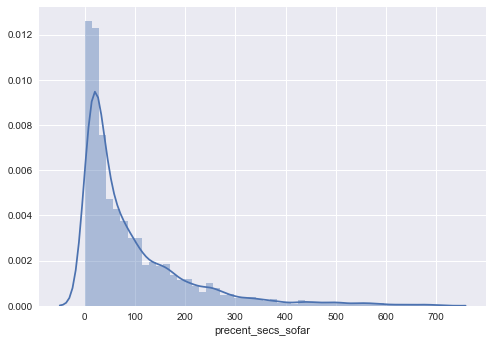

In [61]:
sns.distplot(df8.precent_secs_sofar);

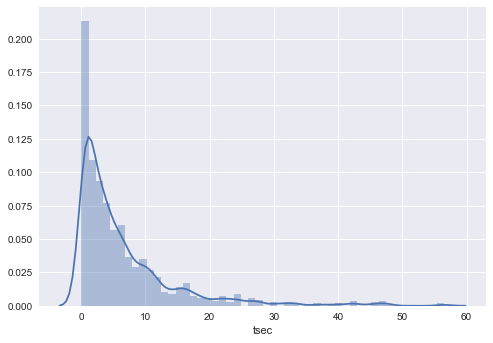

In [28]:
sns.distplot(df8.tsec);

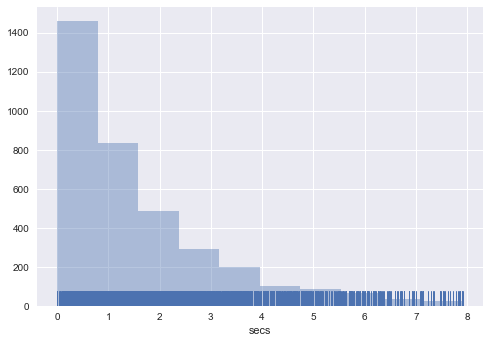

In [29]:
sns.distplot(df8.secs, bins=10, kde=False, rug=True);

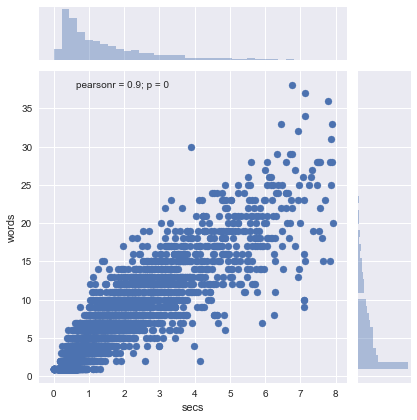

In [30]:
sns.jointplot(x="secs", y="words", data=df8);

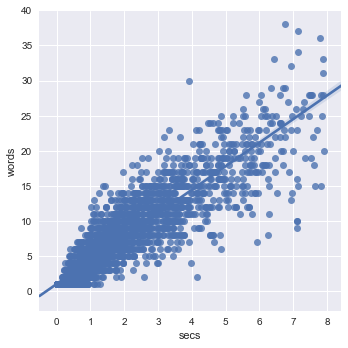

In [46]:
sns.lmplot(x="secs", y="words", data=df8);

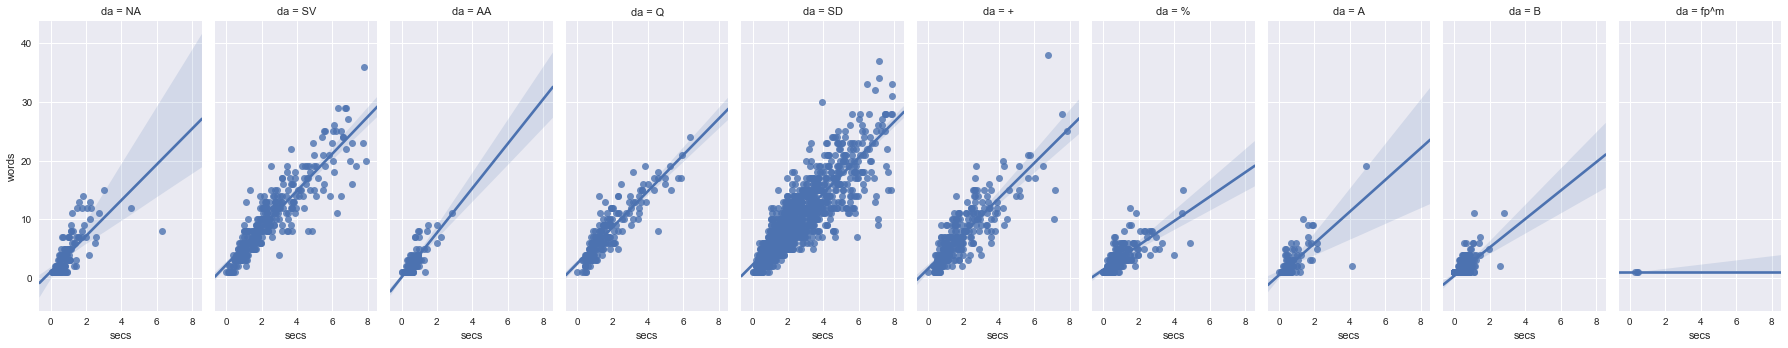

In [33]:
sns.lmplot(x="secs", y="words", col="da", data=df8,aspect=.5);

KeyboardInterrupt: 

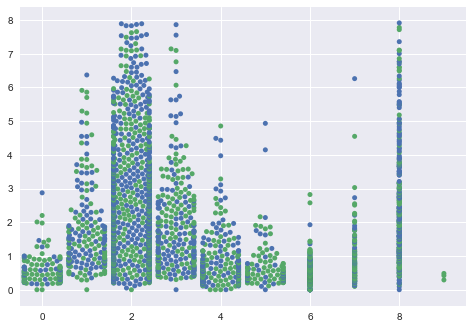

In [49]:
sns.swarmplot(x="da", y="secs", hue="tchange",data=df8);

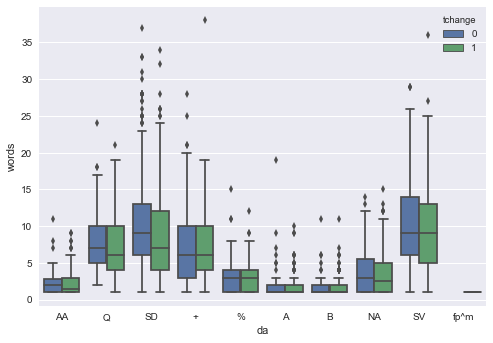

In [51]:
sns.boxplot(x="da", y="words", hue="tchange",data=df8);

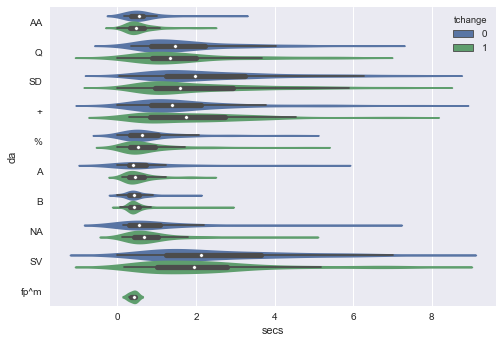

In [52]:
sns.violinplot(x="secs", y="da", hue="tchange", data=df8);

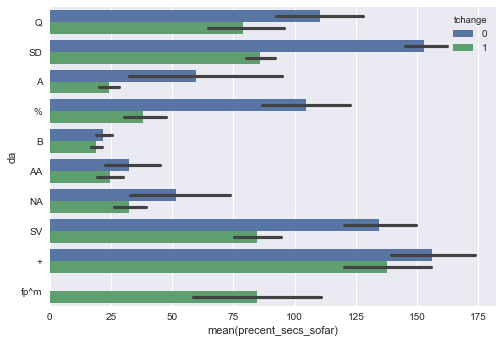

In [65]:
sns.barplot(x="precent_secs_sofar", y="da", hue="tchange", data=df8);

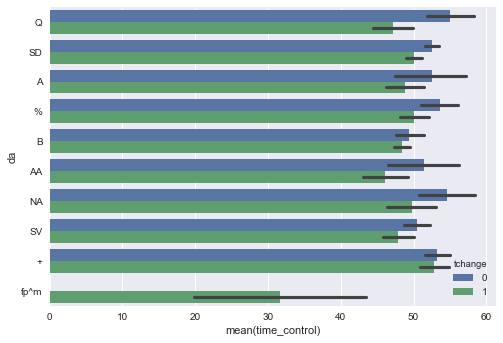

In [71]:
sns.barplot(x="time_control", y="da", hue="tchange", data=df8);

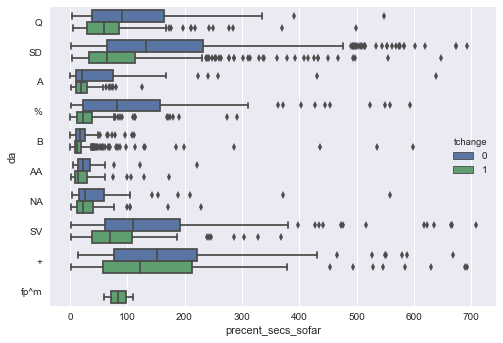

In [63]:
sns.boxplot(x="precent_secs_sofar", y="da", hue="tchange",data=df8);